In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv('../data/ntsb/cleaned/master_train.csv')

In [95]:
data.columns

Index(['Unnamed: 0', 'ev_id', 'ev_type', 'ev_time', 'ev_year', 'ev_month',
       'on_ground_collision', 'latitude', 'longitude', 'apt_dist',
       'light_cond', 'wx_dew_pt', 'wind_vel_kts', 'gust_kts', 'altimeter',
       'ev_highest_injury', 'inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd',
       'inj_tot_f', 'inj_tot_m', 'inj_tot_n', 'inj_tot_s', 'inj_tot_t',
       'aircraft_count', 'Aircraft_ID', 'event_key', 'Aircraft_Key',
       'engine_ELEC', 'engine_GTFN', 'engine_HR', 'engine_LR', 'engine_NONE',
       'engine_REC', 'engine_TF', 'engine_TJ', 'engine_TP', 'engine_TS',
       'engine_UNK', 'far_part', 'damage', 'acft_fire', 'acft_expl',
       'acft_make', 'acft_category', 'homebuilt', 'total_seats', 'num_eng',
       'fixed_retractable', 'date_last_insp', 'owner_acft', 'certs_held',
       'oprtng_cert', 'oper_cert', 'type_fly', 'second_pilot', 'evacuation',
       'rwy_len', 'rwy_width', 'acft_year', 'fuel_on_board', 'unmanned',
       'finding_description', 'Aircraft', 'Environme

### Notes

The number of people onboard can be calculated from the injury totals. Note that this is not the same as `inj_tot_total`, which also includes people injured on the ground. Given the low frequency of ground injuries, I think we should focus on onboard injuries / injury proportion

In [104]:
data = data.rename(columns={'inj_tot_f':'inj_tot_fatal',
             'inj_tot_m':'inj_tot_minor',
             'inj_tot_n':'inj_tot_none',
             'inj_tot_s':'inj_tot_serious'
})

In [105]:
data.columns

Index(['Unnamed: 0', 'ev_id', 'ev_type', 'ev_time', 'ev_year', 'ev_month',
       'on_ground_collision', 'latitude', 'longitude', 'apt_dist',
       'light_cond', 'wx_dew_pt', 'wind_vel_kts', 'gust_kts', 'altimeter',
       'ev_highest_injury', 'inj_f_grnd', 'inj_m_grnd', 'inj_s_grnd',
       'inj_tot_fatal', 'inj_tot_minor', 'inj_tot_none', 'inj_tot_serious',
       'inj_tot_t', 'aircraft_count', 'Aircraft_ID', 'event_key',
       'Aircraft_Key', 'engine_ELEC', 'engine_GTFN', 'engine_HR', 'engine_LR',
       'engine_NONE', 'engine_REC', 'engine_TF', 'engine_TJ', 'engine_TP',
       'engine_TS', 'engine_UNK', 'far_part', 'damage', 'acft_fire',
       'acft_expl', 'acft_make', 'acft_category', 'homebuilt', 'total_seats',
       'num_eng', 'fixed_retractable', 'date_last_insp', 'owner_acft',
       'certs_held', 'oprtng_cert', 'oper_cert', 'type_fly', 'second_pilot',
       'evacuation', 'rwy_len', 'rwy_width', 'acft_year', 'fuel_on_board',
       'unmanned', 'finding_description', 'Airc

In [107]:
data['num_people_onboard'] = data['inj_tot_fatal'] + data['inj_tot_minor'] + data['inj_tot_none'] + data['inj_tot_serious']
data['prop_onboard_inj'] =  (data['num_people_onboard'] - data['inj_tot_none'])/ data['num_people_onboard']
data['prop_onboard_inj_minor'] =  data['inj_tot_minor'] / data['num_people_onboard']
data['prop_onboard_inj_serious'] =  data['inj_tot_serious'] / data['num_people_onboard']
data['prop_onboard_inj_fatal'] =  data['inj_tot_fatal'] / data['num_people_onboard']

# Exploration

I'm trying to figure out how to combine the four categories of injury (none, minor, serious, fatal) into a single metric of crash severity in a reasonable way.

### Observations 
- In > 80% of fatal crashes, everyone onboard died

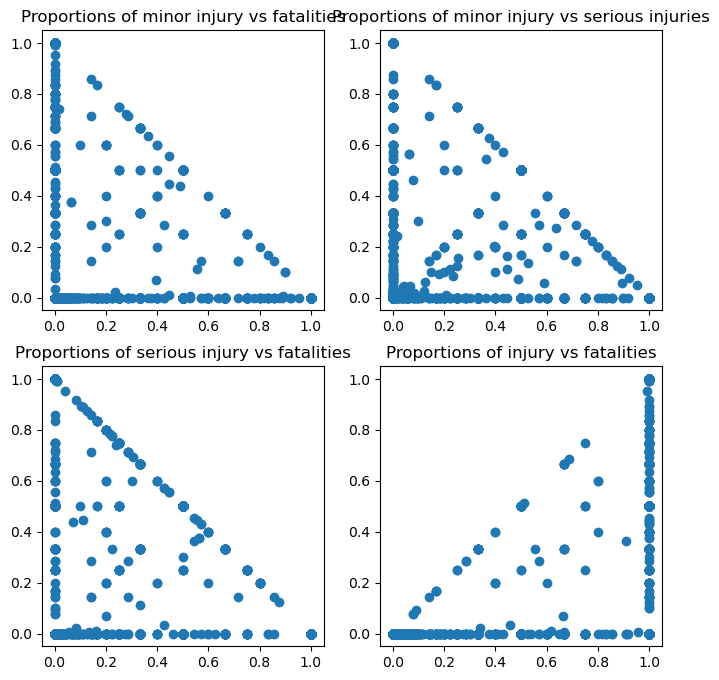

In [110]:
fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].scatter(data.prop_onboard_inj_minor, data.prop_onboard_inj_fatal)
ax[0,0].set_title('Proportions of minor injury vs fatalities')

ax[0,1].scatter(data.prop_onboard_inj_minor, data.prop_onboard_inj_serious)
ax[0,1].set_title('Proportions of minor injury vs serious injuries')

ax[1,0].scatter(data.prop_onboard_inj_serious, data.prop_onboard_inj_fatal)
ax[1,0].set_title('Proportions of serious injury vs fatalities')

ax[1,1].scatter(data.prop_onboard_inj, data.prop_onboard_inj_fatal)
ax[1,1].set_title('Proportions of injury vs fatalities')

plt.show()

In [111]:
data_fatal = data.loc[data['inj_tot_fatal'] > 0]
data_serious = data.loc[data['ev_highest_injury'] == "SERS"]

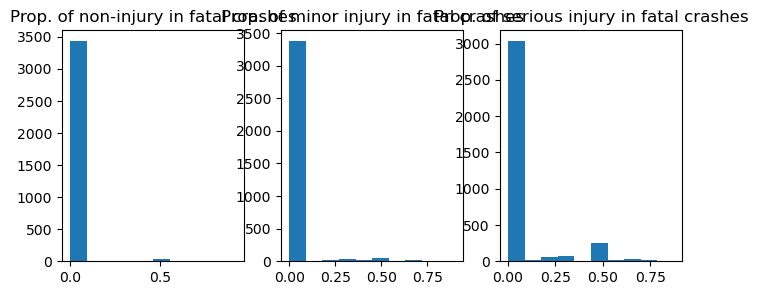

In [112]:
fig, ax = plt.subplots(1,3,figsize=(8,3))

ax[0].hist(1-data_fatal['prop_onboard_inj'])
ax[0].set_title('Prop. of non-injury in fatal crashes')

ax[1].hist(data_fatal['prop_onboard_inj_minor'])
ax[1].set_title('Prop. of minor injury in fatal crashes')

ax[2].hist(data_fatal['prop_onboard_inj_serious'])
ax[2].set_title('Prop. of serious injury in fatal crashes')

plt.show()

In [113]:
feat = ['prop_onboard_uninj','prop_onboard_inj_minor','prop_onboard_inj_serious','prop_onboard_inj_fatal']
data[feat].corr()

KeyError: "['prop_onboard_uninj'] not in index"

In [114]:
len(data_fatal)

3518

In [115]:
data_fatal.prop_onboard_inj_fatal.value_counts()

prop_onboard_inj_fatal
1.000000    2874
0.500000     334
0.333333      74
0.666667      58
0.250000      32
0.750000      27
0.200000      14
0.400000      11
0.600000      10
0.800000       9
0.833333       7
0.142857       7
0.714286       6
0.285714       4
0.166667       4
0.555556       3
0.857143       2
0.444444       2
0.375000       2
0.100000       2
0.076923       2
0.571429       2
0.428571       2
0.777778       2
0.916667       1
0.437500       1
0.692308       1
0.512500       1
0.895349       1
0.888889       1
0.741379       1
0.007143       1
0.951807       1
0.090909       1
0.021277       1
0.990385       1
0.687500       1
0.363636       1
0.636364       1
0.785714       1
0.067164       1
0.993464       1
0.009772       1
0.300000       1
0.454545       1
0.031915       1
0.991150       1
0.125000       1
0.111111       1
0.007874       1
0.722222       1
0.875000       1
Name: count, dtype: int64